****
# Conceiving the Corps of ***Les Bijoux indiscrets***: A Case Study for the Computational Text Analysis of Bodily Representation in French Literature

**DIGHUM 101
Alexis Stanley**
****

# Research question

**Most broadly, my research questions are: what can mediatized bodies (such as depictions of the body in literature) tell us about societal norms or expectations, and how can they further our understanding of what the human body represents at specific historical moments? I am particularly interested in the problems that arise when scholars use literary depictions of the bodies as exemplifications of lived phenomena, beyond mere fiction.**

**These are hardly new questions, but in my studies I've become particularly critical of how scholars tend to consider the presentation of human bodies in literary works as examples of historical bodily phenomena/norms. This especially seems to be the case when contemporary scholars rely on "early modern" (i.e. pre-1800) works to establish their arguments as historically informed. The risk in doing so is (of course) the conflation of literary fiction with lived bodily experience!**

**With this in mind, I have intended my final project to be an exploratory case study of this 'problem' of highlighting literary depictions of the body in cultural criticism. My specific case study here focuses on Denis Diderot's** ***Les Bijoux indiscrets*** **(The Indiscreet Toys, 1748), and Michel Foucault's interpretation of the work in** ***The History of Sexuality (Volume I)*** **. In brief, Diderot is a famous French Enlightenment philosopher and Foucault is a late 20th-century French philosopher.** ***Les Bijoux indicrets*** **is the story of a Sultan, Mangogul, in fictionalized/orientalized Congo who receives a magic ring to make the "bijoux" of the women in his realm recount their sexual exploits (or lack thereof). Foucault sees in this “fable” an allegory of the Western “will to know” (“volonté de savoir”) about sex, in spite of—and, paradoxically, thanks to—various historical norms and practices that have rendered the subject taboo since the nineteenth century. Problematically, Foucault likens the textual representation of the body in** ***Les Bijoux indiscrets*** **to the historical, lived experience of 'the body’ in the modern era; he argues that both interpretations of the body are predicated on dynamics of power, knowledge, truth, secrecy, and pleasure (i.e. “jeu” or “game”).**

**But is Foucault’s interpretation the only way to make sense of the literary depiction of the body in Diderot’s text? In this project, I will try to determine whether word frequency analysis can tell us anything (with or against Foucault) about the textual presence of the body in** ***Les Bijoux indiscrets*** **.**

# Background on data source and why I chose it

**My data source is the Gutenberg Project’s transcription of** ***Les Bijoux indiscrets*** **(based on the Bibliothèque nationale de France’s digital 1748 edition of the text).**

**Why this data source? There are two main reasons: 1) the work is already digitized as plain text, and 2) the archival text on which it is based is considered the most complete and authoritative version of the work available.**

# Uploading ***Les Bijoux indiscrets*** from Project Gutenberg

In [2]:
bijoux_text_clean = open("/Users/alexisstanley/Documents/DIGHUM 101/Assignments/Les Bijoux indiscrets", encoding = "utf-8").read()
print(bijoux_text_clean)

A ZIMA[8]

[Note 8: Il ne nous semble pas que cette jeune fille puisse être,
comme on l'a dit, Mme de Puisieux, qui était jeune, il est vrai, mais
mariée. C'est un nom en l'air. Mme de Puisieux serait plutôt Aglaé,
la _sage_ Aglaé, «des plus vertueuses et des moins édifiantes.»]


Zima, profitez du moment. L'aga Narkis entretient votre mère, et votre
gouvernante guette sur un balcon le retour de votre père: prenez, lisez,
ne craignez rien. Mais quand on surprendrait _les Bijoux indiscrets_
derrière votre toilette, pensez-vous qu'on s'en étonnât? Non, Zima, non;
on sait que _le Sopha_, _le Tanzaï_ et _les Confessions_[9] ont été sous
votre oreiller. Vous hésitez encore? Apprenez donc qu'Aglaé n'a pas
dédaigné de mettre la main à l'ouvrage que vous rougissez d'accepter.
«Aglaé, dites-vous, la sage Aglaé!...» Elle-même. Tandis que Zima
s'ennuyait ou s'égarait peut-être avec le jeune bonze Alléluia, Aglaé
s'amusait innocemment à m'instruire des aventures de Zaïde, d'Alphane,
de Fanni, etc.

**I used the application Sublime Text to upload this Project Gutenberg text in utf-8 format and delete the Project's legal statements prior to importing.**

**Ideally, I would learn how to delete the "Notes" from this text. At this point in my DH studies, however, the varying attributes of each individual note make them too difficult for me to remove with the codes I know.**

**Nevertheless, for the purposes of this project, including the notes as part of the main text document will not alter our results too much (there are only 100 notes, each about a sentence or two long, in the entire several hundred-page book).**

In [3]:
bijoux_text_dirty = bijoux_text_clean

# NON NLTK METHOD (I will use NLTK farther down below)

# How many sentences?

In [4]:
print(len(bijoux_text_dirty.split("."))) 
#we will see below that this is NOT a good way to count sentences in this text!!

4911


# How many words?

In [5]:
print(len(bijoux_text_dirty.split()))
#We will see that the NLTK method (below) produces different results.
#here the results are skewed because we have not "cleaned" the text.

83616


# How many unique words?

In [6]:
print(len(set(bijoux_text_dirty.lower().split())))

18163


# How many characters?

In [7]:
print(len(bijoux_text_dirty))

505521


# Converting to lower case

In [8]:
bijoux_text_dirty = bijoux_text_dirty.lower()

In [9]:
print(bijoux_text_dirty)

a zima[8]

[note 8: il ne nous semble pas que cette jeune fille puisse être,
comme on l'a dit, mme de puisieux, qui était jeune, il est vrai, mais
mariée. c'est un nom en l'air. mme de puisieux serait plutôt aglaé,
la _sage_ aglaé, «des plus vertueuses et des moins édifiantes.»]


zima, profitez du moment. l'aga narkis entretient votre mère, et votre
gouvernante guette sur un balcon le retour de votre père: prenez, lisez,
ne craignez rien. mais quand on surprendrait _les bijoux indiscrets_
derrière votre toilette, pensez-vous qu'on s'en étonnât? non, zima, non;
on sait que _le sopha_, _le tanzaï_ et _les confessions_[9] ont été sous
votre oreiller. vous hésitez encore? apprenez donc qu'aglaé n'a pas
dédaigné de mettre la main à l'ouvrage que vous rougissez d'accepter.
«aglaé, dites-vous, la sage aglaé!...» elle-même. tandis que zima
s'ennuyait ou s'égarait peut-être avec le jeune bonze alléluia, aglaé
s'amusait innocemment à m'instruire des aventures de zaïde, d'alphane,
de fanni, etc.

# Removing punctuation

In [10]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
for char in punctuation:
    bijoux_text_dirty = bijoux_text_dirty.replace(char, "") #need to keep variable name the same

In [12]:
print(bijoux_text_dirty)

a zima8

note 8 il ne nous semble pas que cette jeune fille puisse être
comme on la dit mme de puisieux qui était jeune il est vrai mais
mariée cest un nom en lair mme de puisieux serait plutôt aglaé
la sage aglaé «des plus vertueuses et des moins édifiantes»


zima profitez du moment laga narkis entretient votre mère et votre
gouvernante guette sur un balcon le retour de votre père prenez lisez
ne craignez rien mais quand on surprendrait les bijoux indiscrets
derrière votre toilette pensezvous quon sen étonnât non zima non
on sait que le sopha le tanzaï et les confessions9 ont été sous
votre oreiller vous hésitez encore apprenez donc quaglaé na pas
dédaigné de mettre la main à louvrage que vous rougissez daccepter
«aglaé ditesvous la sage aglaé» ellemême tandis que zima
sennuyait ou ségarait peutêtre avec le jeune bonze alléluia aglaé
samusait innocemment à minstruire des aventures de zaïde dalphane
de fanni etc me fournissait le peu de traits qui me plaisent dans
lhistoire de mangogu

**Curious! The French quotation marks were not removed! Indeed, they are not included in 'punctuation'**

In [13]:
bijoux_text_dirty = bijoux_text_dirty.replace("«", "")

In [14]:
bijoux_text_dirty = bijoux_text_dirty.replace("»", "")

In [15]:
print(bijoux_text_dirty) #yay! But the 'Notes' #'s are still there... I want to remove those too!

a zima8

note 8 il ne nous semble pas que cette jeune fille puisse être
comme on la dit mme de puisieux qui était jeune il est vrai mais
mariée cest un nom en lair mme de puisieux serait plutôt aglaé
la sage aglaé des plus vertueuses et des moins édifiantes


zima profitez du moment laga narkis entretient votre mère et votre
gouvernante guette sur un balcon le retour de votre père prenez lisez
ne craignez rien mais quand on surprendrait les bijoux indiscrets
derrière votre toilette pensezvous quon sen étonnât non zima non
on sait que le sopha le tanzaï et les confessions9 ont été sous
votre oreiller vous hésitez encore apprenez donc quaglaé na pas
dédaigné de mettre la main à louvrage que vous rougissez daccepter
aglaé ditesvous la sage aglaé ellemême tandis que zima
sennuyait ou ségarait peutêtre avec le jeune bonze alléluia aglaé
samusait innocemment à minstruire des aventures de zaïde dalphane
de fanni etc me fournissait le peu de traits qui me plaisent dans
lhistoire de mangogul la

In [16]:
print(type(bijoux_text_dirty))

<class 'str'>


In [17]:
import re #'Regular Expression' ; I got this info online!

re.sub? #Signature: re.sub(pattern, repl, string, count=0, flags=0)
#Docstring:
#Return the string obtained by replacing the leftmost
#non-overlapping occurrences of the pattern in string by the
#replacement repl.  repl can be either a string or a callable;
#if a string, backslash escapes in it are processed.  If it is
#a callable, it's passed the Match object and must return
#a replacement string to be used.

In [18]:
bijoux_dirty_noint = re.sub(r'\d+', '', bijoux_text_dirty) 
#\d+, where \d is known as a metacharacter that matches any digit (same as [0-9])
#this code will replace integers with nothing
print(bijoux_dirty_noint)

a zima

note  il ne nous semble pas que cette jeune fille puisse être
comme on la dit mme de puisieux qui était jeune il est vrai mais
mariée cest un nom en lair mme de puisieux serait plutôt aglaé
la sage aglaé des plus vertueuses et des moins édifiantes


zima profitez du moment laga narkis entretient votre mère et votre
gouvernante guette sur un balcon le retour de votre père prenez lisez
ne craignez rien mais quand on surprendrait les bijoux indiscrets
derrière votre toilette pensezvous quon sen étonnât non zima non
on sait que le sopha le tanzaï et les confessions ont été sous
votre oreiller vous hésitez encore apprenez donc quaglaé na pas
dédaigné de mettre la main à louvrage que vous rougissez daccepter
aglaé ditesvous la sage aglaé ellemême tandis que zima
sennuyait ou ségarait peutêtre avec le jeune bonze alléluia aglaé
samusait innocemment à minstruire des aventures de zaïde dalphane
de fanni etc me fournissait le peu de traits qui me plaisent dans
lhistoire de mangogul la re

# Tokenization with the `nltk` library

In [19]:
!pip install nltk

In [20]:
from nltk.tokenize import word_tokenize

In [21]:
tokens = word_tokenize(bijoux_dirty_noint)
print(tokens)

['a', 'zima', 'note', 'il', 'ne', 'nous', 'semble', 'pas', 'que', 'cette', 'jeune', 'fille', 'puisse', 'être', 'comme', 'on', 'la', 'dit', 'mme', 'de', 'puisieux', 'qui', 'était', 'jeune', 'il', 'est', 'vrai', 'mais', 'mariée', 'cest', 'un', 'nom', 'en', 'lair', 'mme', 'de', 'puisieux', 'serait', 'plutôt', 'aglaé', 'la', 'sage', 'aglaé', 'des', 'plus', 'vertueuses', 'et', 'des', 'moins', 'édifiantes', 'zima', 'profitez', 'du', 'moment', 'laga', 'narkis', 'entretient', 'votre', 'mère', 'et', 'votre', 'gouvernante', 'guette', 'sur', 'un', 'balcon', 'le', 'retour', 'de', 'votre', 'père', 'prenez', 'lisez', 'ne', 'craignez', 'rien', 'mais', 'quand', 'on', 'surprendrait', 'les', 'bijoux', 'indiscrets', 'derrière', 'votre', 'toilette', 'pensezvous', 'quon', 'sen', 'étonnât', 'non', 'zima', 'non', 'on', 'sait', 'que', 'le', 'sopha', 'le', 'tanzaï', 'et', 'les', 'confessions', 'ont', 'été', 'sous', 'votre', 'oreiller', 'vous', 'hésitez', 'encore', 'apprenez', 'donc', 'quaglaé', 'na', 'pas', 'd

In [22]:
print(len(tokens))

83481


# Sentence segmentation with NLTK

In [23]:
from nltk.tokenize import sent_tokenize
sent_tokenize(bijoux_text_clean) #I'm using the clean version as I've already manipulated the dirty version

["A ZIMA[8]\n\n[Note 8: Il ne nous semble pas que cette jeune fille puisse être,\ncomme on l'a dit, Mme de Puisieux, qui était jeune, il est vrai, mais\nmariée.",
 "C'est un nom en l'air.",
 'Mme de Puisieux serait plutôt Aglaé,\nla _sage_ Aglaé, «des plus vertueuses et des moins édifiantes.»]\n\n\nZima, profitez du moment.',
 "L'aga Narkis entretient votre mère, et votre\ngouvernante guette sur un balcon le retour de votre père: prenez, lisez,\nne craignez rien.",
 "Mais quand on surprendrait _les Bijoux indiscrets_\nderrière votre toilette, pensez-vous qu'on s'en étonnât?",
 'Non, Zima, non;\non sait que _le Sopha_, _le Tanzaï_ et _les Confessions_[9] ont été sous\nvotre oreiller.',
 'Vous hésitez encore?',
 "Apprenez donc qu'Aglaé n'a pas\ndédaigné de mettre la main à l'ouvrage que vous rougissez d'accepter.",
 '«Aglaé, dites-vous, la sage Aglaé!...» Elle-même.',
 "Tandis que Zima\ns'ennuyait ou s'égarait peut-être avec le jeune bonze Alléluia, Aglaé\ns'amusait innocemment à m'instr

In [24]:
print(len(sent_tokenize(bijoux_text_clean))) 
#although this method gives a more accurate # of sentences than above, the text includes phrases like "etc."
#these phrases do not necessarily end a sentence, so we must be skeptical of the accuracy of this number.

4247


# Removing French stop words

In [25]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexisstanley/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexisstanley/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
from nltk.corpus import stopwords
stop = stopwords.words("french") #make sure to specify the language as French!
stop

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'je',
 'la',
 'le',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',
 'ayants',
 'eu'

In [27]:
no_stops = [word for word in tokens if word not in stopwords.words('french')]
no_stops

['a',
 'zima',
 'note',
 'semble',
 'cette',
 'jeune',
 'fille',
 'puisse',
 'être',
 'comme',
 'dit',
 'mme',
 'puisieux',
 'jeune',
 'vrai',
 'mariée',
 'cest',
 'nom',
 'lair',
 'mme',
 'puisieux',
 'plutôt',
 'aglaé',
 'sage',
 'aglaé',
 'plus',
 'vertueuses',
 'moins',
 'édifiantes',
 'zima',
 'profitez',
 'moment',
 'laga',
 'narkis',
 'entretient',
 'mère',
 'gouvernante',
 'guette',
 'balcon',
 'retour',
 'père',
 'prenez',
 'lisez',
 'craignez',
 'rien',
 'quand',
 'surprendrait',
 'les',
 'bijoux',
 'indiscrets',
 'derrière',
 'toilette',
 'pensezvous',
 'quon',
 'sen',
 'étonnât',
 'non',
 'zima',
 'non',
 'sait',
 'sopha',
 'tanzaï',
 'les',
 'confessions',
 'sous',
 'oreiller',
 'hésitez',
 'encore',
 'apprenez',
 'donc',
 'quaglaé',
 'na',
 'dédaigné',
 'mettre',
 'main',
 'louvrage',
 'rougissez',
 'daccepter',
 'aglaé',
 'ditesvous',
 'sage',
 'aglaé',
 'ellemême',
 'tandis',
 'zima',
 'sennuyait',
 'ségarait',
 'peutêtre',
 'jeune',
 'bonze',
 'alléluia',
 'aglaé',
 's

# Stemming

In [28]:
from nltk.stem.snowball import SnowballStemmer

**Let's print all the languages that NLTK's Snowball Stemmer handles**

In [29]:
print(" ".join(SnowballStemmer.languages)) #French is on the list!

arabic danish dutch english finnish french german hungarian italian norwegian porter portuguese romanian russian spanish swedish


In [30]:
stemmer = SnowballStemmer("french")

**The below line of code basically translates to, “for every word (or token) in the no_stops list, transform it into its stem, and store this new list of stems in a variable called stems.”**

In [31]:
stems = [stemmer.stem(word) for word in no_stops]

In [32]:
print(stems)

['a', 'zim', 'not', 'sembl', 'cet', 'jeun', 'fill', 'puiss', 'être', 'comm', 'dit', 'mme', 'puisieux', 'jeun', 'vrai', 'mari', 'cest', 'nom', 'lair', 'mme', 'puisieux', 'plutôt', 'agla', 'sag', 'agla', 'plus', 'vertueux', 'moin', 'édifi', 'zim', 'profit', 'moment', 'lag', 'nark', 'entretient', 'mer', 'gouvern', 'guet', 'balcon', 'retour', 'per', 'pren', 'lis', 'craign', 'rien', 'quand', 'surprendr', 'le', 'bijoux', 'indiscret', 'derri', 'toilet', 'pensezvous', 'quon', 'sen', 'éton', 'non', 'zim', 'non', 'sait', 'soph', 'tanzaï', 'le', 'confess', 'sous', 'oreil', 'hésit', 'encor', 'appren', 'donc', 'quagla', 'na', 'dédaign', 'mettr', 'main', 'louvrag', 'roug', 'daccept', 'agla', 'ditesvous', 'sag', 'agla', 'ellemêm', 'tand', 'zim', 'sennui', 'ségar', 'peutêtr', 'jeun', 'bonz', 'allélui', 'agla', 'samus', 'innocent', 'minstruir', 'aventur', 'zaïd', 'dalphan', 'fann', 'etc', 'fourn', 'peu', 'trait', 'plaisent', 'lhistoir', 'mangogul', 'revoi', 'mindiqu', 'le', 'moyen', 'rendr', 'meilleur'

**Let's check in with our data: are the above stems really "clean"? Not really - the fact that the French language contracts many words via ' , which were all removed with the punctuation, has now resulted in the smushing together of words that should be separate... e.g. l'air ("le air", or "the air") has now become "lair". Ideally, I would have somehow figured out how to extend all the contractions prior to removing punctuation, but I have not yet figured out how to do this!**

**Also, curiously, suddenly the apparent stop word, "le" ("the") has showed up again in our tokens! This must be because the plural "the", "les", has been stemmed to its root, "le"! Annoying...I would try to remove it again, but now I'm curious to see how this error in Python's French stop words will impact our results.**

# Lemmatization

**Let's see if we have any more luck with lemmatizing the stems instead.**

In [33]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [34]:
print(" ".join(WordNetLemmatizer.languages))

AttributeError: type object 'WordNetLemmatizer' has no attribute 'languages'

**Hmmm here we get an error message - let's do a quick Google search instead! ... Oh no! WordNetLemmatizer only works for English. A quick Google search on the Classical Languages Toolkit (CLTK) also informs me that a French lemmatizer exists... for Old French (i.e. 8th-14th-century French). We might be out of luck here, but on the bright side, that means there is room for improvement for Python's French processing!**

# Count word frequencies (using Python's built-in function `Counter`)

**Though it would be ideal to count word frequencies after lemmatizing, I'm left with no choice but to work with our stems. Though it's frustrating, let's see what happens!**

In [35]:
from collections import Counter #collections library with a Counter function
freq = Counter(stems)

In [36]:
freq.most_common(10)

[('le', 1470),
 ('plus', 459),
 ('tout', 445),
 ('quil', 437),
 ('a', 357),
 ('si', 354),
 ('femm', 335),
 ('dun', 331),
 ('cet', 327),
 ('dit', 323)]

**Argh!! Almost all of these words are really stop words (or at least insignificant words) in disguise!**

**Here are what the words mean:**

le (stem of "les"): "the"

plus: "more"

quil (really "qu'il"): "that he/it"

a: "has"

si: "if"

femm (really "femme(s)" etc.): RE "woman/women"

dun (really "d'un"): "of a"

cet (**strange** the stem for "cet" (and "cette", and "ces" for that matter!) should really be "ce": "this" or "that"

dit: "says"

**Someone should tell Python....at least in the case of "the" and perhaps "cet"!**

**The only two interesting stems above are "femm", a stem indicating women and "dit". So, in** ***Les Bijoux indiscrets*** **there is evidently an interest in women and in dialogue or storytelling.** 

**Let's look for a wider ranger of words:**

In [37]:
freq.most_common(100)

[('le', 1470),
 ('plus', 459),
 ('tout', 445),
 ('quil', 437),
 ('a', 357),
 ('si', 354),
 ('femm', 335),
 ('dun', 331),
 ('cet', 327),
 ('dit', 323),
 ('mangogul', 322),
 ('sultan', 280),
 ('point', 277),
 ('quel', 277),
 ('bien', 276),
 ('cest', 261),
 ('cel', 255),
 ('bijou', 238),
 ('répond', 218),
 ('comm', 215),
 ('fait', 213),
 ('madam', 210),
 ('san', 201),
 ('mirzoz', 195),
 ('deux', 186),
 ('quon', 181),
 ('sélim', 173),
 ('rien', 171),
 ('quelqu', 170),
 ('grand', 163),
 ('autr', 161),
 ('favorit', 158),
 ('parl', 151),
 ('dont', 142),
 ('leur', 136),
 ('tous', 134),
 ('il', 133),
 ('repr', 131),
 ('encor', 130),
 ('donc', 130),
 ('bijoux', 127),
 ('princ', 125),
 ('où', 122),
 ('don', 121),
 ('homm', 120),
 ('jam', 120),
 ('trouv', 117),
 ('moin', 116),
 ('bon', 112),
 ('nen', 112),
 ('pass', 111),
 ('nest', 111),
 ('part', 108),
 ('chos', 107),
 ('fair', 106),
 ('lon', 106),
 ('quun', 105),
 ('ny', 102),
 ('jour', 101),
 ('not', 100),
 ('sen', 100),
 ('temp', 98),
 ('fort'

**Below are the words (with their English translations) from the above list of stems with 'significant' meaning:**

**Significant nouns:**

femm(e) (woman); Mangogul (Sultan's name); sultan; bijou (jewel); madam(e); Mirzoz(a) (name of the Sultan's Favorite);  Sélim (male courtier and interlocutor of Mangogul & Mirzoza); favorit(e); bijoux (jewels); princ(e); homm(e) (man); jour (day); temp(s) (time); têt(e) (head); raison (reason); cour (court); peu (little); mot (word); fois (time(s)); main (hand); propos (remarks); chapitr(e) (chapter); sort (fate); yeux (eyes)

**NOTE: "bijoux" (word freq. 127) ideally should have been lemmatized to "bijou" (word freq. 238). If we had been able to work with lemmatized words, "bijou" would have been listed as our 5th most frequent word (total word freq. 365 (127 +238)), and our most frequent "significant" word in the text!**

**Significant adjectives:** 

grand (big); fort (strong); jeun(e) (young); seul (alone); petit (small)

**Significant verbs:**

dit (says); répond (responds); parl(e) (says); repr(end) (continues); trouv(e) (finds); note (notes); continu(e) (continues); demand (asks); dir(a) (said)

**Significant interjection**
voilà (there you have it/here is...)

# Foucauldian word frequencies (for fun)

**For fun, let's convert the no_stops list of tuples (extended to the whole set of tokens) into a dictionary so we can easily call upon word frequencies (without worrying about entering the stems of the words).**

In [38]:
freq_no_stops = Counter(no_stops)

In [39]:
freq_no_stops.most_common(100)

[('les', 1470),
 ('plus', 459),
 ('quil', 376),
 ('a', 357),
 ('si', 354),
 ('mangogul', 322),
 ('dit', 311),
 ('bien', 275),
 ('point', 271),
 ('tout', 270),
 ('cest', 261),
 ('sultan', 247),
 ('bijou', 238),
 ('comme', 212),
 ('madame', 210),
 ('sans', 201),
 ('répondit', 198),
 ('mirzoza', 195),
 ('dun', 187),
 ('quelle', 186),
 ('deux', 186),
 ('femmes', 182),
 ('cette', 181),
 ('quon', 181),
 ('sélim', 173),
 ('cela', 172),
 ('rien', 170),
 ('fait', 162),
 ('favorite', 158),
 ('femme', 153),
 ('dune', 144),
 ('dont', 142),
 ('leurs', 136),
 ('tous', 134),
 ('ils', 133),
 ('encore', 130),
 ('donc', 130),
 ('bijoux', 127),
 ('reprit', 126),
 ('où', 122),
 ('jamais', 120),
 ('prince', 116),
 ('moins', 115),
 ('nen', 112),
 ('nest', 111),
 ('faire', 106),
 ('lon', 106),
 ('toutes', 106),
 ('ny', 102),
 ('temps', 98),
 ('note', 96),
 ('non', 95),
 ('grand', 92),
 ('aussi', 91),
 ('jai', 91),
 ('ah', 90),
 ('peu', 86),
 ('quelques', 86),
 ('fort', 85),
 ('tête', 85),
 ('quelque', 84),
 

In [40]:
bijoux_wordfr_dict = dict(freq_no_stops.most_common())

In [41]:
bijoux_wordfr_dict["les"] #yay! Our dictionary works.

1470

**Let's check out the frequencies of some words that would have been of interest to Foucault.**

In [42]:
print(bijoux_wordfr_dict["corps"])
print(bijoux_wordfr_dict["pouvoir"])
print(bijoux_wordfr_dict["savoir"])
print(bijoux_wordfr_dict["secret"])
print(bijoux_wordfr_dict["sexe"])
print(bijoux_wordfr_dict["vérité"])

28
12
28
17
16
41


**None of these words made the top 100 most frequent words in the text! Doesn't necessarily indicate that Foucault was wrong in picking up on themes of the text - just that he had a clearly interpretative agenda.**

# Part of speech tagging

In [43]:
from nltk import pos_tag

In [44]:
#We should NOT remove stop words prior to part of speech tagging, so I'm using the variable tokens, from above.
pos_tagged_tokens = pos_tag(tokens)

In [45]:
pos_tagged_tokens

[('a', 'DT'),
 ('zima', 'JJ'),
 ('note', 'NN'),
 ('il', 'NN'),
 ('ne', 'RB'),
 ('nous', 'JJ'),
 ('semble', 'JJ'),
 ('pas', 'NN'),
 ('que', 'NN'),
 ('cette', 'NN'),
 ('jeune', 'NN'),
 ('fille', 'VBP'),
 ('puisse', 'NN'),
 ('être', 'NNP'),
 ('comme', 'NN'),
 ('on', 'IN'),
 ('la', 'NN'),
 ('dit', 'NN'),
 ('mme', 'NN'),
 ('de', 'IN'),
 ('puisieux', 'FW'),
 ('qui', 'JJ'),
 ('était', 'NNP'),
 ('jeune', 'NN'),
 ('il', 'NN'),
 ('est', 'JJS'),
 ('vrai', 'NN'),
 ('mais', 'NN'),
 ('mariée', 'NN'),
 ('cest', 'NN'),
 ('un', 'JJ'),
 ('nom', 'NN'),
 ('en', 'IN'),
 ('lair', 'JJ'),
 ('mme', 'FW'),
 ('de', 'FW'),
 ('puisieux', 'FW'),
 ('serait', 'NN'),
 ('plutôt', 'NN'),
 ('aglaé', 'NN'),
 ('la', 'NN'),
 ('sage', 'NN'),
 ('aglaé', 'NN'),
 ('des', 'NNS'),
 ('plus', 'CC'),
 ('vertueuses', 'NNS'),
 ('et', 'VBP'),
 ('des', 'NNS'),
 ('moins', 'NNS'),
 ('édifiantes', 'NNS'),
 ('zima', 'VBP'),
 ('profitez', 'JJ'),
 ('du', 'JJ'),
 ('moment', 'NN'),
 ('laga', 'NN'),
 ('narkis', 'JJ'),
 ('entretient', 'NN'),
 ('v

**From just a quick scroll through the above list, it seems like the text is dominated by nouns (NN/NNS), followed by adjectives (JJ, etc.). But in reality, the tracking seems to be very incorrect (e.g. "Zima" is characterized as an adjective, as is "nous" ("we") and "semble" ("seems"); "fille" ("girl") is characterized as a verb... so I'm not going to further pursue this analysis.**

# Data Statistics & Visualization

In [46]:
import math
import random

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('savefig', dpi=200)
plt.style.use('classic')
plt.rcParams['xtick.minor.size'] = 0
plt.rcParams['ytick.minor.size'] = 0

In [47]:
%matplotlib inline

**Let's make a DataFrame of the top 50 stems (which will include both "bijou" and "bijoux") and their frequencies**

In [48]:
top_45_stems_DF = pd.DataFrame(freq.most_common(45), columns = ["Stem" , "Frequency"])
top_45_stems_DF

Stem  Frequency
0         le       1470
1       plus        459
2       tout        445
3       quil        437
4          a        357
5         si        354
6       femm        335
7        dun        331
8        cet        327
9        dit        323
10  mangogul        322
11    sultan        280
12     point        277
13      quel        277
14      bien        276
15      cest        261
16       cel        255
17     bijou        238
18    répond        218
19      comm        215
20      fait        213
21     madam        210
22       san        201
23    mirzoz        195
24      deux        186
25      quon        181
26     sélim        173
27      rien        171
28    quelqu        170
29     grand        163
30      autr        161
31   favorit        158
32      parl        151
33      dont        142
34      leur        136
35      tous        134
36        il        133
37      repr        131
38     encor        130
39      donc        130
40    bijoux        127
41     princ        125
42        où        122
43       don        121
44      homm        120

**We can also get some summary statistics RE word frequencies from the whole document**

In [49]:
all_stems_DF = pd.DataFrame(freq.most_common(), columns = ["Stem" , "Frequency"])
all_stems_DF

Stem  Frequency
0               le       1470
1             plus        459
2             tout        445
3             quil        437
4                a        357
5               si        354
6             femm        335
7              dun        331
8              cet        327
9              dit        323
10        mangogul        322
11          sultan        280
12           point        277
13            quel        277
14            bien        276
15            cest        261
16             cel        255
17           bijou        238
18          répond        218
19            comm        215
20            fait        213
21           madam        210
22             san        201
23          mirzoz        195
24            deux        186
25            quon        181
26           sélim        173
27            rien        171
28          quelqu        170
29           grand        163
...            ...        ...
7132       tilleul          1
7133     reproduit          1
7134         lavon          1
7135        dallus          1
7136         lesqu          1
7137    intervient          1
7138      devineur          1
7139        dénigm          1
7140     richelieu          1
7141          diff          1
7142       laffirm          1
7143       allianc          1
7144    condescend          1
7145      lautrich          1
7146         charl          1
7147          frey          1
7148       neuvill          1
7149           exc          1
7150           mgr          1
7151     catafalqu          1
7152        noubli          1
7153     palanquin          1
7154       pharmac          1
7155         garus          1
7156    dangleterr          1
7157     quallaisj          1
7158        nimput          1
7159  continuezmoi          1
7160        spectr          1
7161    encapuchon          1

[7162 rows x 2 columns]

**Haha! Wow... we see that the words at the bottom of the list (with frequency of 1) are absolutely ridiculous due to the the issue of contracted words (or inverted questions) we discussed above. No wonder these "stems" only appear once in the text...However, this issue aside, we still see that the word "tilleul" ("tea") appears only once. This story clearly wasn't taking place in England. :)**

In [50]:
all_stems_DF.describe() 

Frequency
count  7162.000000
mean      6.901564
std      27.744363
min       1.000000
25%       1.000000
50%       2.000000
75%       5.000000
max    1470.000000

**These statistics somewhat make sense (but the jumbled words with frequencies of 1 are problematic!!):**
- There are 7162 "stems" analyzed
- The most frequent stem appears 1470 times
- The least frequent stems appear once
- The average word frequency is ~7 times
- Standard deviation and percentiles are also given

**Let's graph our DataFrame of the top 45 stems and their frequencies**

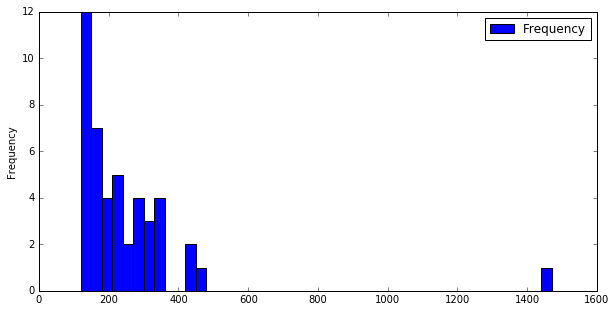

In [51]:
top_45_stems_DF.plot.hist(x="Stem", y="Frequency", bins=45, figsize=(10,5))

**Oops! I goofed...What are we really plotting here? A histogram! (What did we want? A barplot, which I will present below). Histograms represent a distribution of data. The x-axis is actualy representing the Frequency column of our DF, and the y-axis is actually representing the number of stems at those frequencies. This is because by default, DataFrame.plot plots with the rows as the x-axis. The question is, is this data visualization still useful?**

**The addition of the labels below will help us understand this (not very useful, as it was a mistake!) graph.**

Text(0.5, 1.0, 'Number of Stems per Given Frequency')

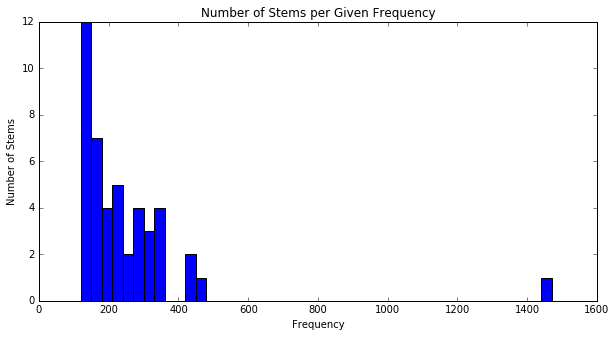

In [52]:
top_45_stems_DF["Frequency"].plot(kind="hist",
                            bins=45,
                            figsize=(10,5))
plt.ylabel("Number of Stems")
plt.xlabel("Frequency")
plt.title("Number of Stems per Given Frequency")

In [53]:
#here's an easier-to-understand version of our DF to see what we are plotting above
lets_see = pd.DataFrame(top_45_stems_DF["Frequency"].value_counts())
lets_see

Frequency
277           2
130           2
255           1
131           1
280           1
215           1
120           1
276           1
210           1
335           1
142           1
459           1
218           1
201           1
213           1
327           1
134           1
261           1
195           1
323           1
151           1
158           1
1470          1
437           1
445           1
331           1
136           1
186           1
121           1
122           1
133           1
127           1
181           1
161           1
238           1
173           1
171           1
170           1
357           1
125           1
163           1
354           1
322           1

Text(0.5, 1.0, 'Number of Stems per Given Frequency')

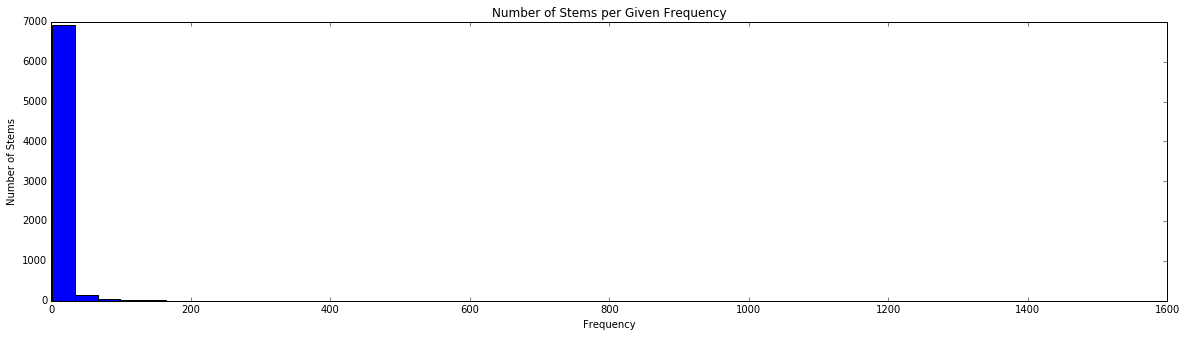

In [54]:
#Out of curiosity, let's plot this for the full collection of stems.
all_stems_DF["Frequency"].plot(kind="hist",
                            bins=45,
                            figsize=(20,5))
plt.ylabel("Number of Stems")
plt.xlabel("Frequency")
plt.title("Number of Stems per Given Frequency")

Text(0.5, 1.0, 'Number of Stems per Given Frequency')

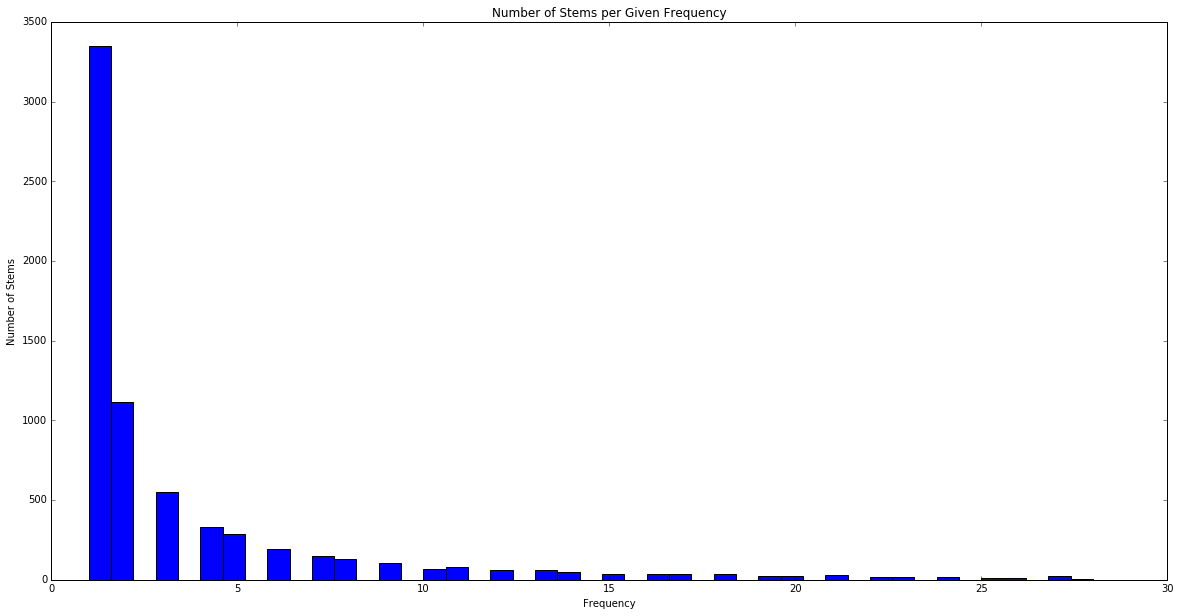

In [55]:
#Let's zoom in (but this will skew what we see)
all_stems_DF.truncate(before=300)["Frequency"].plot(kind="hist",
                            bins=45,
                            figsize=(20,10))
plt.ylabel("Number of Stems")
plt.xlabel("Frequency")
plt.title("Number of Stems per Given Frequency")

**In conclusion, this mistake graph is not very helpful in terms of analysis, but we can see that the text is completely dominated by words that only appear once. I'd bet that this has more to do with the issues we've been having with cleaning French text in Python than anything regarding Diderot's writing style!**

**Now, let's create the barplot of the top 45 stems with their frequencies, which I had originally intended to display.**

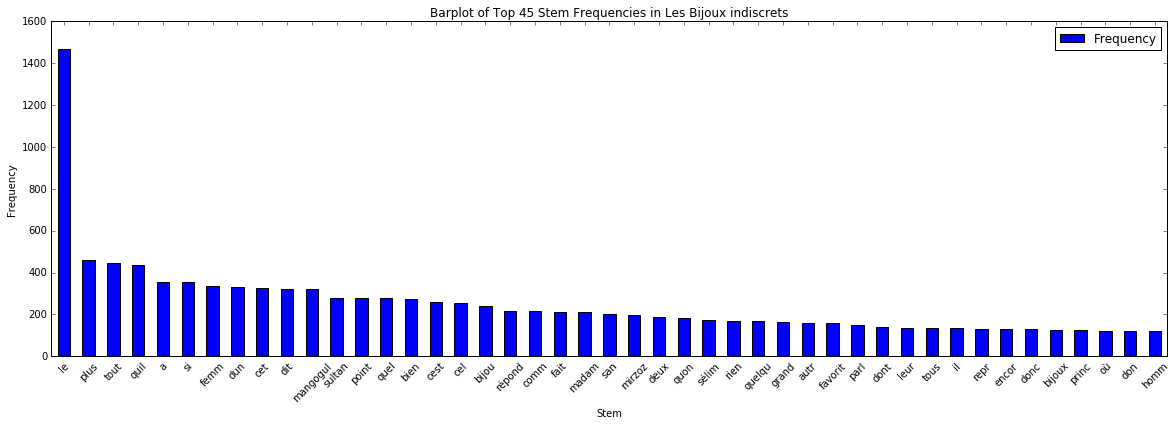

In [56]:
barplot = top_45_stems_DF.plot.bar(x='Stem', y='Frequency', 
                                  rot=45, #rotation of x-axis labels
                                  title = "Barplot of Top 45 Stem Frequencies in Les Bijoux indiscrets",
                                  figsize = (20,6));
plt.xlabel("Stem");
plt.ylabel("Frequency");

**Once again, we see how drastically the issue of including the "le" (stemmed version of "les", which really should have been included as a French stop word and removed) has skewed our results. This is annoying for the purposes of our project, but very telling with regard to the struggles of studying minority modern languages through an English-dominated coding language!**

# What does it all mean? What did you find? What did you learn?

**Some take home points:**
- Processing French text in Python is more difficult than I expected - not necessarily because of the code, but because of the lack of information available on the web.
- An analysis of word frequency can only demonstrate so much... (context is key!)
- However, as we saw above, an emphasis on the role of the *female* body in *Les Bijoux indiscrets* in particular appears to be more important than just an emphasis on the body (and non-gendered sexuality) in *Les Bijoux indiscrets* (this is hardly surprising, given the title, even if Foucault did not make this point!).
- Ditto perhaps goes for the role of bodily *fragmentation*: I think it's interesting that the word "corps" ("body") is not frequently present in the text, yet the words "bijou(x)", "tête" (head), and "yeux" (eyes) are, as we saw.
- How about the extreme emphasis on storytelling? (Check out our most frequent verbs!) This would seem to suggest that the role of narration (rumors, hearsay) is extremely central to *Les Bijoux indiscrets*, yet this is not a theme discussed in Foucault's interpretation.
- In conclusion, Foucault wasn't necessarily "wrong" in his interpretive choices, though it is interesting that none of the key themes he analyzes are among the most frequently appearing words/topics in the original text.
- Ultimately, however, I'd say that the argumentative power of this project is rather limited (though the experience of processing French text was interesting). After all, high word frequency does not necessarily equate to thematic importance. Nevertheless, this project was eye-opening for someone who hopes to become better equipped to analyze French (and Italian, German, or Latin) texts in Python. There is clearly work to be done not only on the side of literary or "humanistic" interpretation, but on the side of the coding as well!

# What would you have done differently if you had unlimited time and money? Where should future research go? 

Some additional manipulations to the text I could have done to bolster my argument would include Count Vectorizing and TF-IDF. For example, I could have uploaded each of the 54 chapters in *Les Bijoux indiscrets* as a separate document, classified each according to a main theme (e.g. philosophical discourse/libertine discourse, etc.) and compared certain word frequencies between them. Yet, this would have required much additional close reading (as the text's complexity would make it extremely difficult to classify each chapter according to a single theme, and I do not yet have the background to make Python do so with great accuracy). Perhaps performing a topic analysis as we did in 4-3 would have helped me approach this goal (maybe I can pursue it in summer session D!). Overall, the main objectives for future work should include: research that puts greater emphasis on word *context* and not just frequency; amping up Python's capabilities for French language processing.